## Notebook to troubleshoot MCMC trace decoder

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
from functions import init_mcmc, simulate_traces
from numpy import linalg as LA

### Define system parameters

In [2]:
# transition and emission arrays
A = np.array([[.95, .05, .1],
              [.05, .9, .1],
              [0, .05, .8]])
e = np.array([[.9, .05, .05],
              [.05, .45, .05],
              [.05, .5, .9]])

# basic trace parameters
memory = 7*10 # number of time steps for Pol II to teranscribe gene
dT = 20 # time resolution of experimental data
tau = 2 # minimum time scale of the system
cv_factor = int(dT/tau)
# Fix trace length for now
trace_len = 200 # length of simulated trace (time steps)
# Number of traces per batch
sigma = 20 # stdev of Gaussian noise
r = 20 
alpha = 14
prod_array = np.transpose([0, r, 2*r])
# set priors
a_prior = np.ones((3, 3))
e_prior = np.ones((3, 3))
pi0_prior = np.ones((3))

### Simulate trace

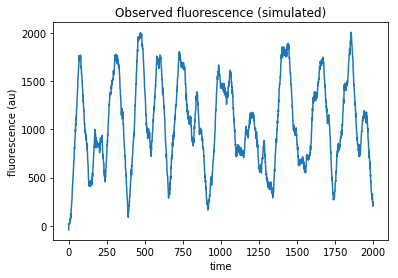

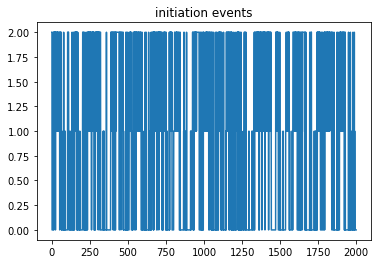

In [3]:
fluo_noise, fluo_raw, fluo_unif, system_states, initiation_states \
    = simulate_traces(tau, dT, memory, trace_len, A, e, r, sigma, alpha)

fig1, ax1 = plt.subplots()
ax1.plot(fluo_noise)
ax1.set_title("Observed fluorescence (simulated)")
ax1.set_xlabel("time")
ax1.set_ylabel("fluorescence (au)")

fig2, ax2 = plt.subplots()
ax2.set_title("initiation events")
ax2.plot(initiation_states)

## Call fitting function

In [4]:
n_steps = 200
logL_list, e_array_list, a_array_list, pi0_array_list = \
    init_mcmc([initiation_states], a_prior, e_prior, pi0_prior, n_steps=n_steps, burn_in=1)

## Track trends in learning (or lack thereof)

Text(0.5, 0, 'iteration')

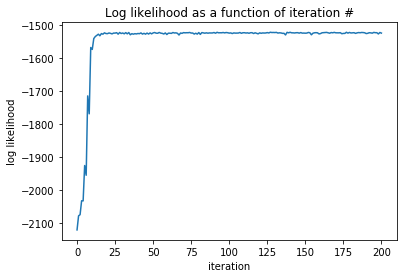

In [5]:
fig1, ax1 = plt.subplots()
ax1.plot(logL_list)
ax1.set_title("Log likelihood as a function of iteration #")
ax1.set_ylabel("log likelihood")
ax1.set_xlabel("iteration")

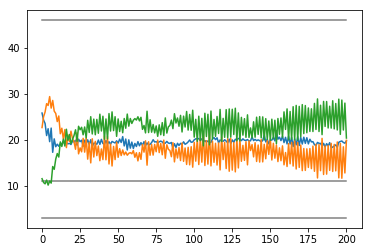

In [6]:
true_prod_array = np.zeros((len(logL_list),3))
inf_prod_array = np.zeros((len(logL_list),3))

for i in range(len(logL_list)):
    true_prod_array[i,:] = np.matmul(e,prod_array)
    inf_prod_array[i,:] = np.matmul(e_array_list[i],prod_array)

plt.plot(true_prod_array,color="gray")
plt.plot(inf_prod_array)

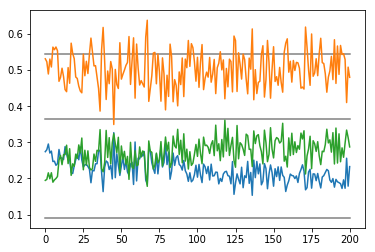

In [7]:
w, v = LA.eig(A)
max_ind = np.argmax(w)
ss_true = v[:,max_ind] / np.sum(v[:,max_ind])

# occupancy vectors
true_ss_array = np.zeros((len(logL_list),3))
inf_ss_array = np.zeros((len(logL_list),3))

for i in range(len(logL_list)):
    true_ss_array[i,:] = ss_true
    w, v = LA.eig(a_array_list[i])
    max_ind = np.argmax(w)
    inf_ss_array[i,:] = v[:,max_ind] / np.sum(v[:,max_ind])
    
plt.plot(true_ss_array,color="gray")
plt.plot(inf_ss_array)

In [8]:
print(a_array_list[-1])

[[0.19642772 0.0086224  0.63678793]
 [0.03461251 0.94848838 0.05797645]
 [0.76895977 0.04288923 0.30523563]]
